# Bikes: Variable importance with different $m$

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
trees = [20, 50, 100]
idatas_bikes = {}
VIs = []

In [5]:
for m in trees:
    with pm.Model() as model_bikes:
        σ = pm.HalfNormal("σ", Y.std())
        μ = pmb.BART("μ", X, Y, m=m)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(chains=4, random_seed=RANDOM_SEED)
        idatas_bikes[str(m)] = idata
        # Variable importance
        VI = idata.sample_stats["variable_inclusion"].mean(("chain", "draw")).values
        VIs.append(VI / VI.sum())

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 46 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 103 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 194 seconds.


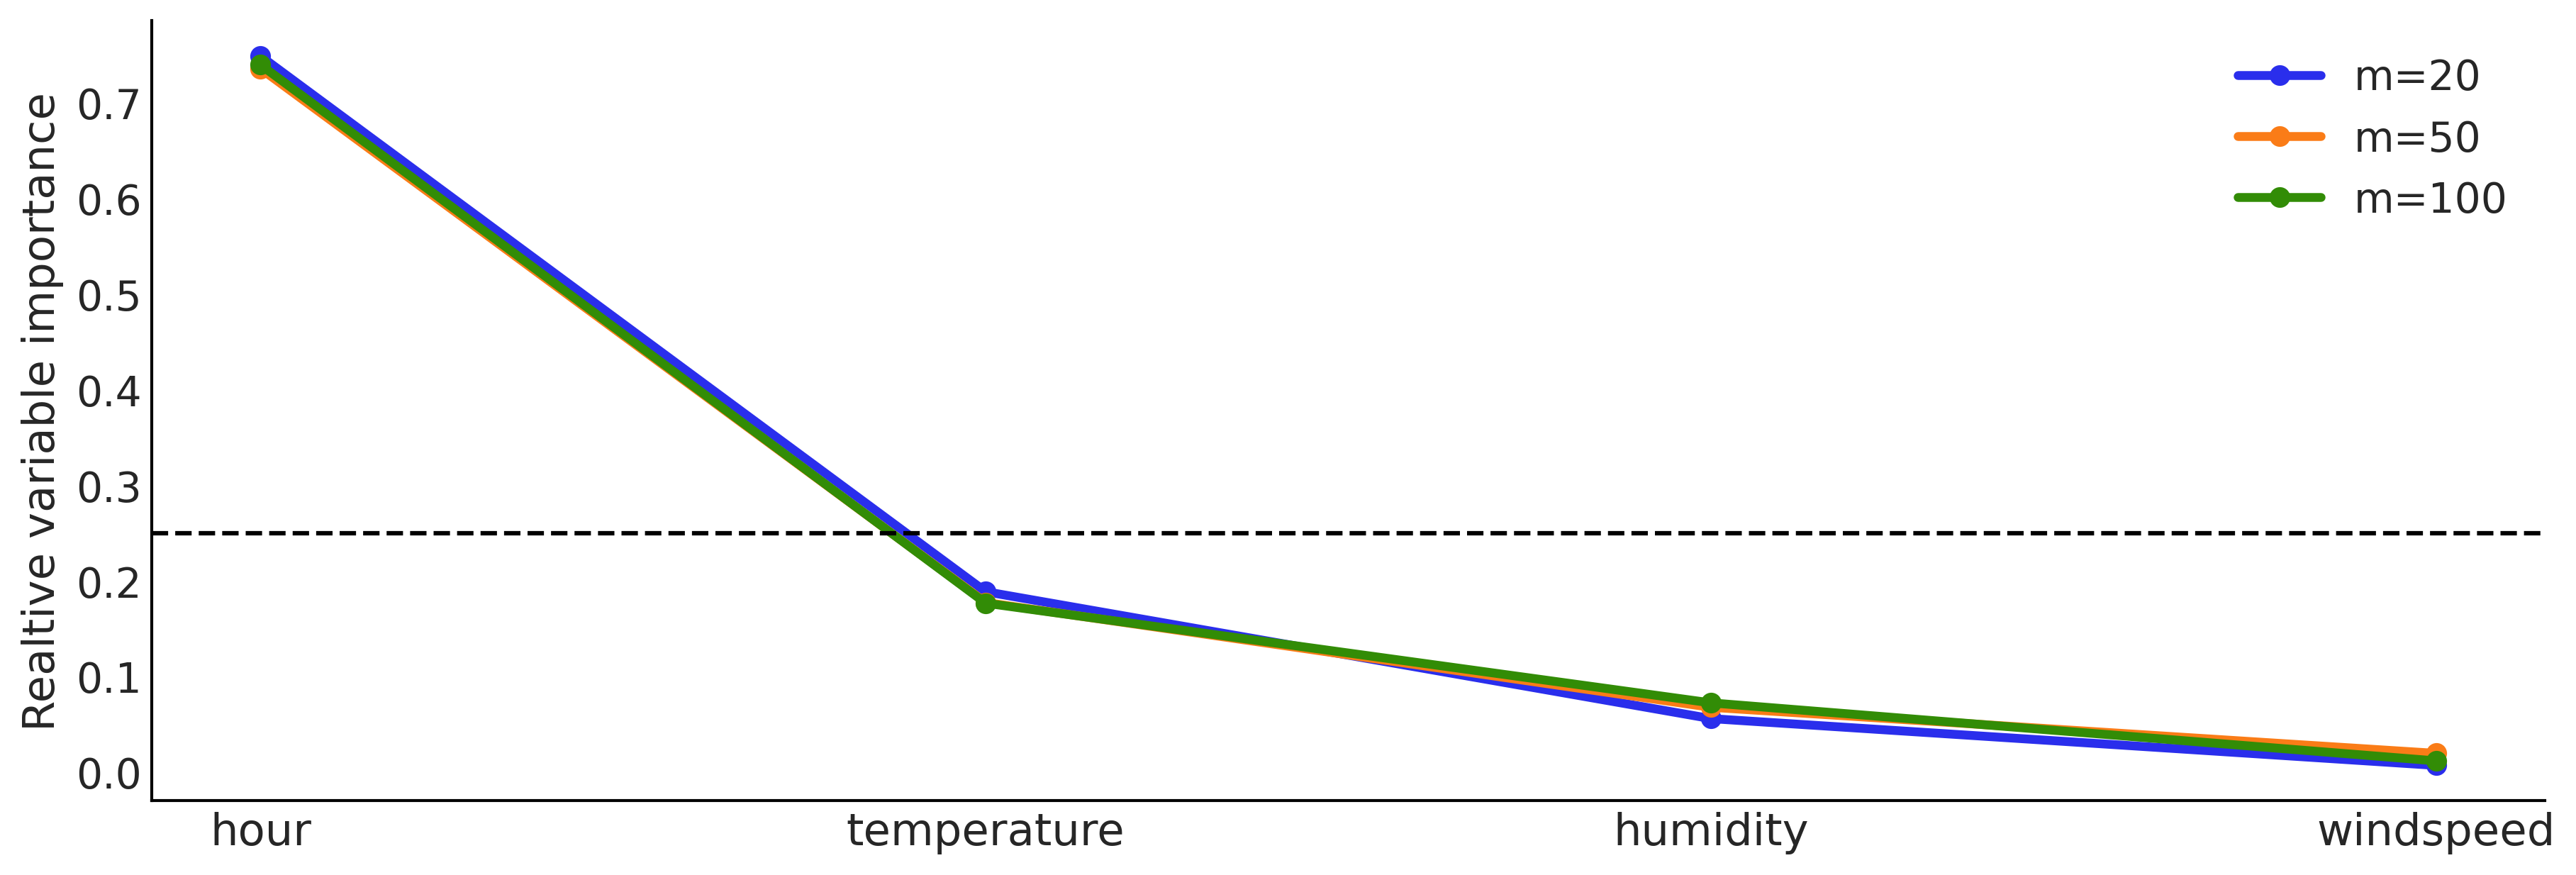

In [6]:
fig, ax = plt.subplots(sharey=True, figsize=(12, 4))

for tree, vi in zip(trees, VIs):
    plt.plot(vi, label=f"m={tree}", lw=3, marker="o")

plt.axhline(1 / X.shape[1], ls="--", color="k")

plt.legend()
plt.ylabel("Realtive variable importance")
plt.xticks(
    ticks=list(range(X.shape[1])), labels=[label for label in X.columns], fontsize=15
)

plt.savefig("bart_vi_bikes.png");